In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
btc_lobs = pd.read_csv('md/btcusdt:Binance:LinearPerpetual/lobs.csv')
btc_trades = pd.read_csv('md/btcusdt:Binance:LinearPerpetual/trades.csv')

eth_lobs = pd.read_csv('md/ethusdt:Binance:LinearPerpetual/lobs.csv')
eth_trades = pd.read_csv('md/ethusdt:Binance:LinearPerpetual/trades.csv')

In [3]:
eth_lobs

,receive_ts,exchange_ts,ethusdt:Binance:LinearPerpetual_ask_price_0,ethusdt:Binance:LinearPerpetual_ask_vol_0,ethusdt:Binance:LinearPerpetual_bid_price_0,ethusdt:Binance:LinearPerpetual_bid_vol_0,ethusdt:Binance:LinearPerpetual_ask_price_1,ethusdt:Binance:LinearPerpetual_ask_vol_1,ethusdt:Binance:LinearPerpetual_bid_price_1,ethusdt:Binance:LinearPerpetual_bid_vol_1,...,ethusdt:Binance:LinearPerpetual_bid_price_7,ethusdt:Binance:LinearPerpetual_bid_vol_7,ethusdt:Binance:LinearPerpetual_ask_price_8,ethusdt:Binance:LinearPerpetual_ask_vol_8,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250395360,1655942402249000000,1049.45,1.046,1049.44,0.782,1049.46,2.229,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
1,1655942402656012600,1655942402655000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
2,1655942403348658915,1655942403348000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
3,1655942404080743828,1655942404080000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
4,1655942404151722232,1655942404151000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539694,1656028781406860422,1656028781406000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539695,1656028781441496250,1656028781441000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539696,1656028781474705210,1656028781474000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539697,1656028781508489746,1656028781508000000,1143.63,20.026,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505


In [4]:
eth_trades

,receive_ts,exchange_ts,aggro_side,price,size
0,1655942402218452815,1655942402217000000,BID,1049.45,0.062
1,1655942402624182869,1655942402623000000,BID,1049.45,0.726
2,1655942402624767109,1655942402623000000,BID,1049.45,0.001
3,1655942402626135583,1655942402623000000,ASK,1049.44,0.022
4,1655942402627026454,1655942402624000000,BID,1049.45,0.005
...,...,...,...,...,...
4873798,1656028780700723809,1656028780700000000,BID,1143.63,0.005
4873799,1656028780953848112,1656028780953000000,ASK,1143.62,8.744
4873800,1656028780991774028,1656028780991000000,BID,1143.63,0.066
4873801,1656028781021533873,1656028781020000000,ASK,1143.62,0.174


# 1 задание

Лучшая цена записана в нулевом индексе, но добавим еще одну колонку для удобства

In [5]:
eth_lobs['best_ask'] = eth_lobs[eth_lobs.columns[2:-1:4]].min(axis=1)
eth_lobs['best_bid'] = eth_lobs[eth_lobs.columns[4:-1:4]].min(axis=1)

btc_lobs['best_ask'] = btc_lobs[btc_lobs.columns[2:-1:4]].min(axis=1)
btc_lobs['best_bid'] = btc_lobs[btc_lobs.columns[4:-1:4]].min(axis=1)

График уровня стаканов (взят отрезок времени первых 1000 наблюдений)

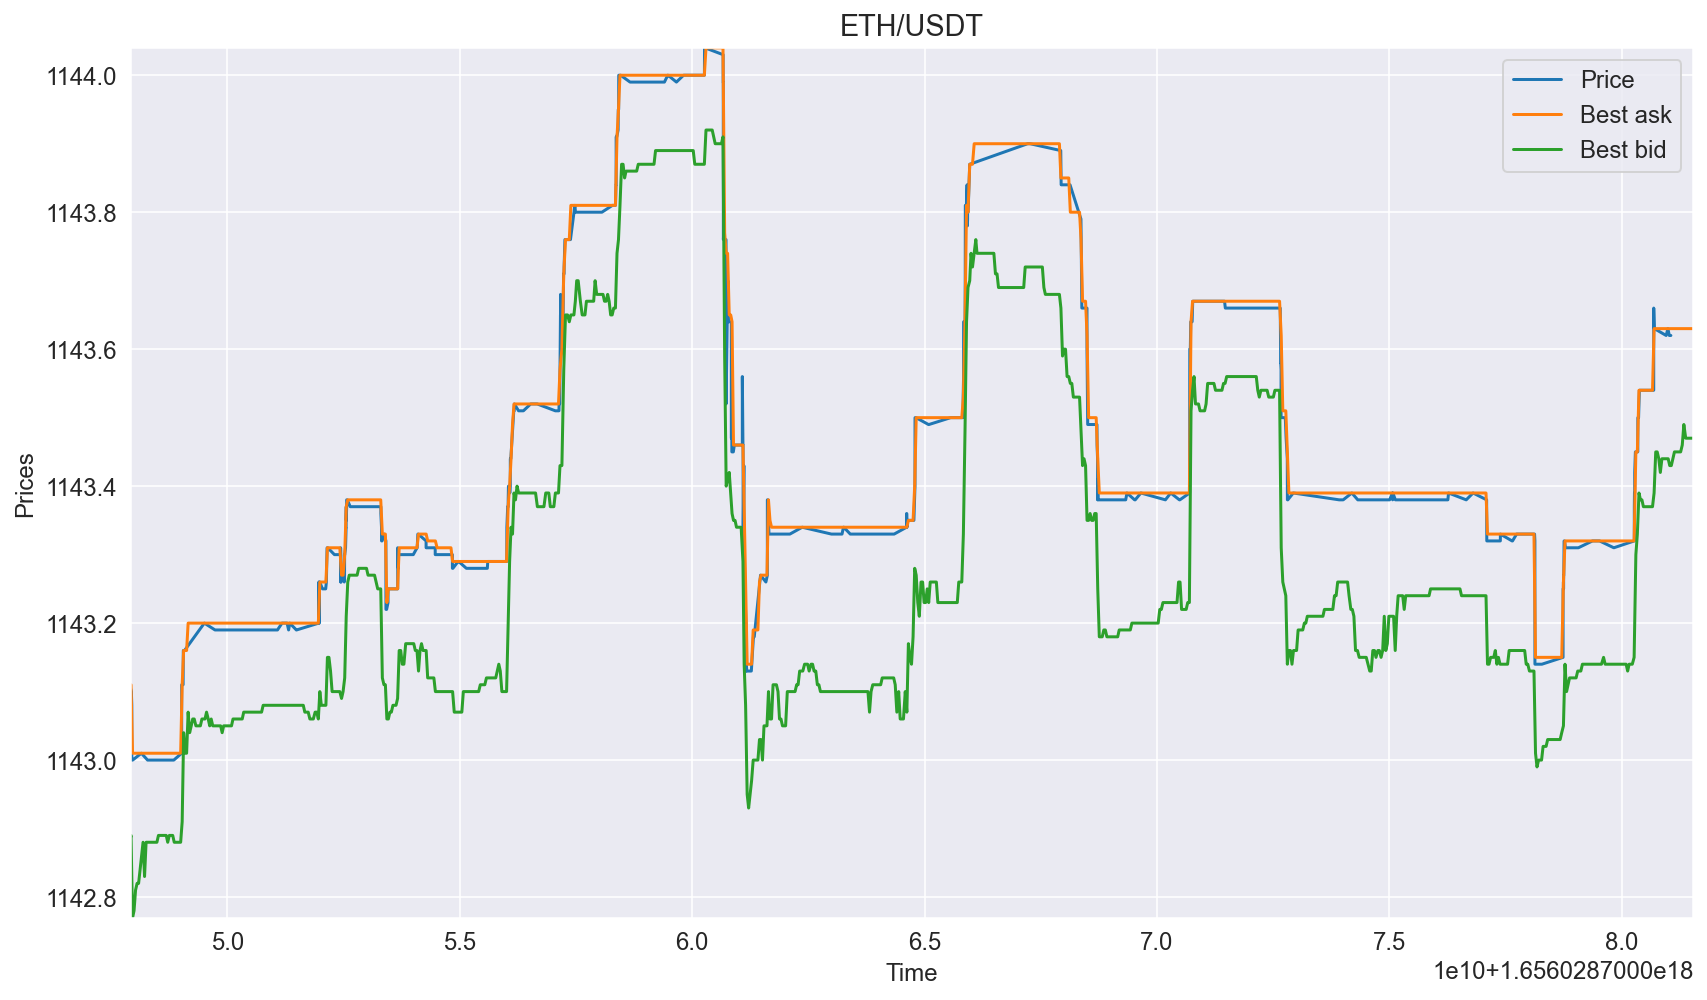

In [6]:
def plot_prices(lobs, trades):
    x_min = lobs.receive_ts.nlargest(1000).values[-1]
    x_max = lobs.receive_ts.nlargest(1000).values[0]
    assert x_min < x_max
    y_min = min(lobs[(lobs.receive_ts >= x_min) &(lobs.receive_ts <= x_max)].best_bid.values)
    y_max = max(lobs[(lobs.receive_ts >= x_min) &(lobs.receive_ts <= x_max)].best_ask.values)
    plt.plot(trades.receive_ts, trades.price)
    plt.plot(lobs.receive_ts, lobs.best_ask)
    plt.plot(lobs.receive_ts, lobs.best_bid)
    plt.legend(['Price', 'Best ask', 'Best bid'])
    plt.ylim(y_min,y_max)
    plt.xlim(x_min, x_max)
    plt.xlabel('Time')
    plt.ylabel('Prices')

plot_prices(eth_lobs, eth_trades)
plt.title('ETH/USDT')
None

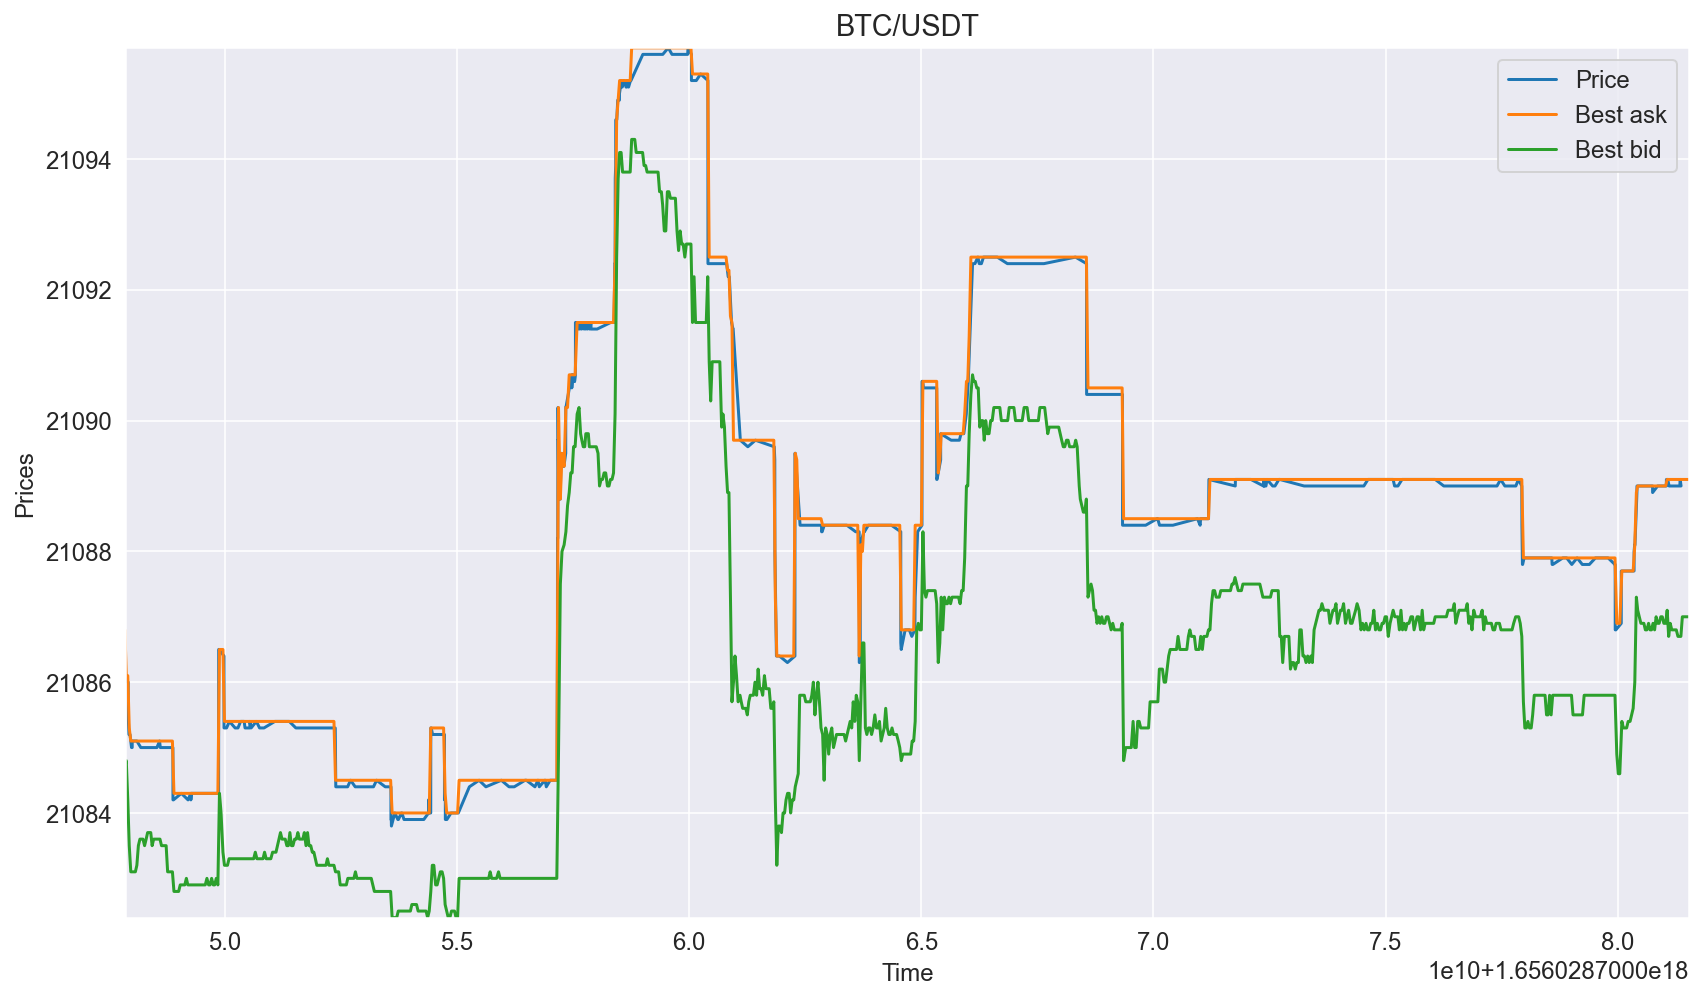

In [7]:
plot_prices(btc_lobs, btc_trades)
plt.title('BTC/USDT')
None

# 2 задание

Статистика для размера трейда

In [8]:
eth_trades['size'].describe(percentiles=[.05, .95])

count    4.873803e+06
mean     1.219873e+00
std      6.333830e+00
min      1.000000e-03
5%       5.000000e-03
50%      1.530000e-01
95%      5.000000e+00
max      1.976214e+03
Name: size, dtype: float64

In [9]:
btc_trades['size'].describe(percentiles=[.05, .95])

count    5.727714e+06
mean     1.220080e-01
std      5.596711e-01
min      1.000000e-03
5%       1.000000e-03
50%      1.700000e-02
95%      5.190000e-01
max      2.357930e+02
Name: size, dtype: float64

# 3 задание

In [10]:
eth_trades['volume'] = eth_trades['size'] * eth_trades['price']
btc_trades['volume'] = btc_trades['size'] * btc_trades['price']

In [11]:
np.arange(.5, 5, .5)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [12]:
eth_trades

,receive_ts,exchange_ts,aggro_side,price,size,volume
0,1655942402218452815,1655942402217000000,BID,1049.45,0.062,65.06590
1,1655942402624182869,1655942402623000000,BID,1049.45,0.726,761.90070
2,1655942402624767109,1655942402623000000,BID,1049.45,0.001,1.04945
3,1655942402626135583,1655942402623000000,ASK,1049.44,0.022,23.08768
4,1655942402627026454,1655942402624000000,BID,1049.45,0.005,5.24725
...,...,...,...,...,...,...
4873798,1656028780700723809,1656028780700000000,BID,1143.63,0.005,5.71815
4873799,1656028780953848112,1656028780953000000,ASK,1143.62,8.744,9999.81328
4873800,1656028780991774028,1656028780991000000,BID,1143.63,0.066,75.47958
4873801,1656028781021533873,1656028781020000000,ASK,1143.62,0.174,198.98988


In [13]:
eth_trades['size'].max()

1976.214

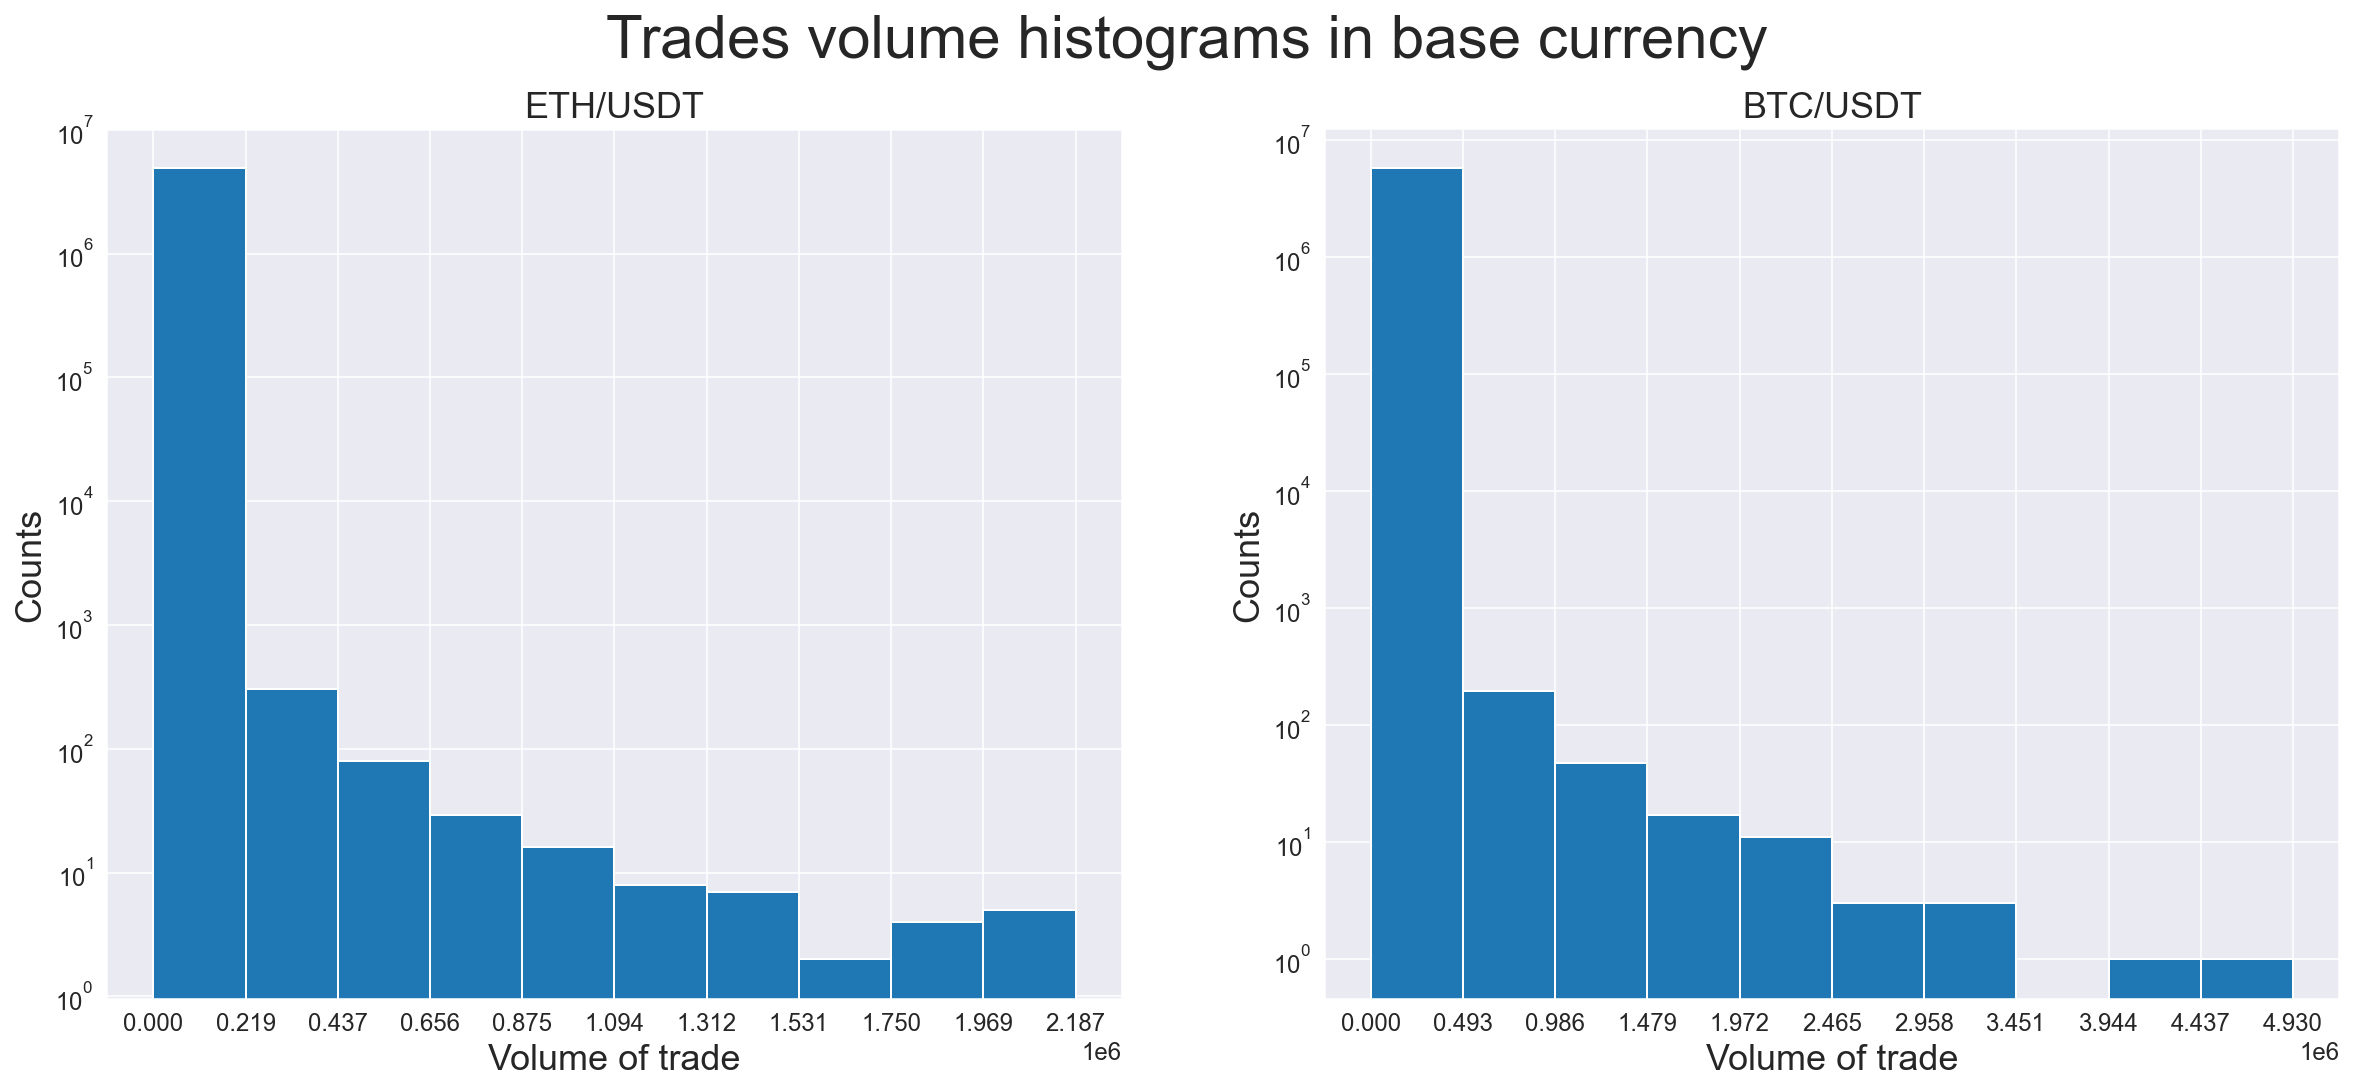

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
_, bins, _ = ax[0].hist(eth_trades['volume'], log=True)
ax[0].set_yscale('log')
ax[0].set_title('ETH/USDT', fontsize=18)
ax[0].set_xlabel('Volume of trade', fontsize=18)
ax[0].set_ylabel('Counts', fontsize=18)
ax[0].set_xticks(bins)

_, bins, _ = ax[1].hist(btc_trades['volume'], log=True)
ax[1].set_title('BTC/USDT', fontsize=18)
ax[1].set_xlabel('Volume of trade', fontsize=18)
ax[1].set_ylabel('Counts', fontsize=18)
ax[1].set_xticks(bins)

fig.suptitle('Trades volume histograms in base currency', fontsize=30)

None

In [15]:
np.array([[1,2],[3,4]]).cumsum(axis=1)

array([[1, 3],
       [3, 7]])

In [16]:
(eth_lobs.iloc[:, 2:19:4].values * eth_lobs.iloc[:, 3:20:4].values).cumsum(axis=1)[:, 1]

array([ 3436.97104,  2683.46608,  2683.46608, ..., 25548.78812,
       25587.67154, 25587.67154])

Объем стаканов мерял в долларах

In [17]:
eth_cum_ask_vol = (eth_lobs.iloc[:, 2:19:4].values * eth_lobs.iloc[:, 3:20:4].values).cumsum(axis=1) 
eth_cum_bid_vol = (eth_lobs.iloc[:, 5:22:4].values * eth_lobs.iloc[:, 4:21:4].values).cumsum(axis=1) 

btc_cum_ask_vol = (btc_lobs.iloc[:, 2:19:4].values * btc_lobs.iloc[:, 3:20:4].values).cumsum(axis=1) 
btc_cum_bid_vol = (btc_lobs.iloc[:, 5:22:4].values * btc_lobs.iloc[:, 4:21:4].values).cumsum(axis=1) 

arr = [[eth_cum_ask_vol, eth_cum_bid_vol], [btc_cum_ask_vol, btc_cum_bid_vol]]

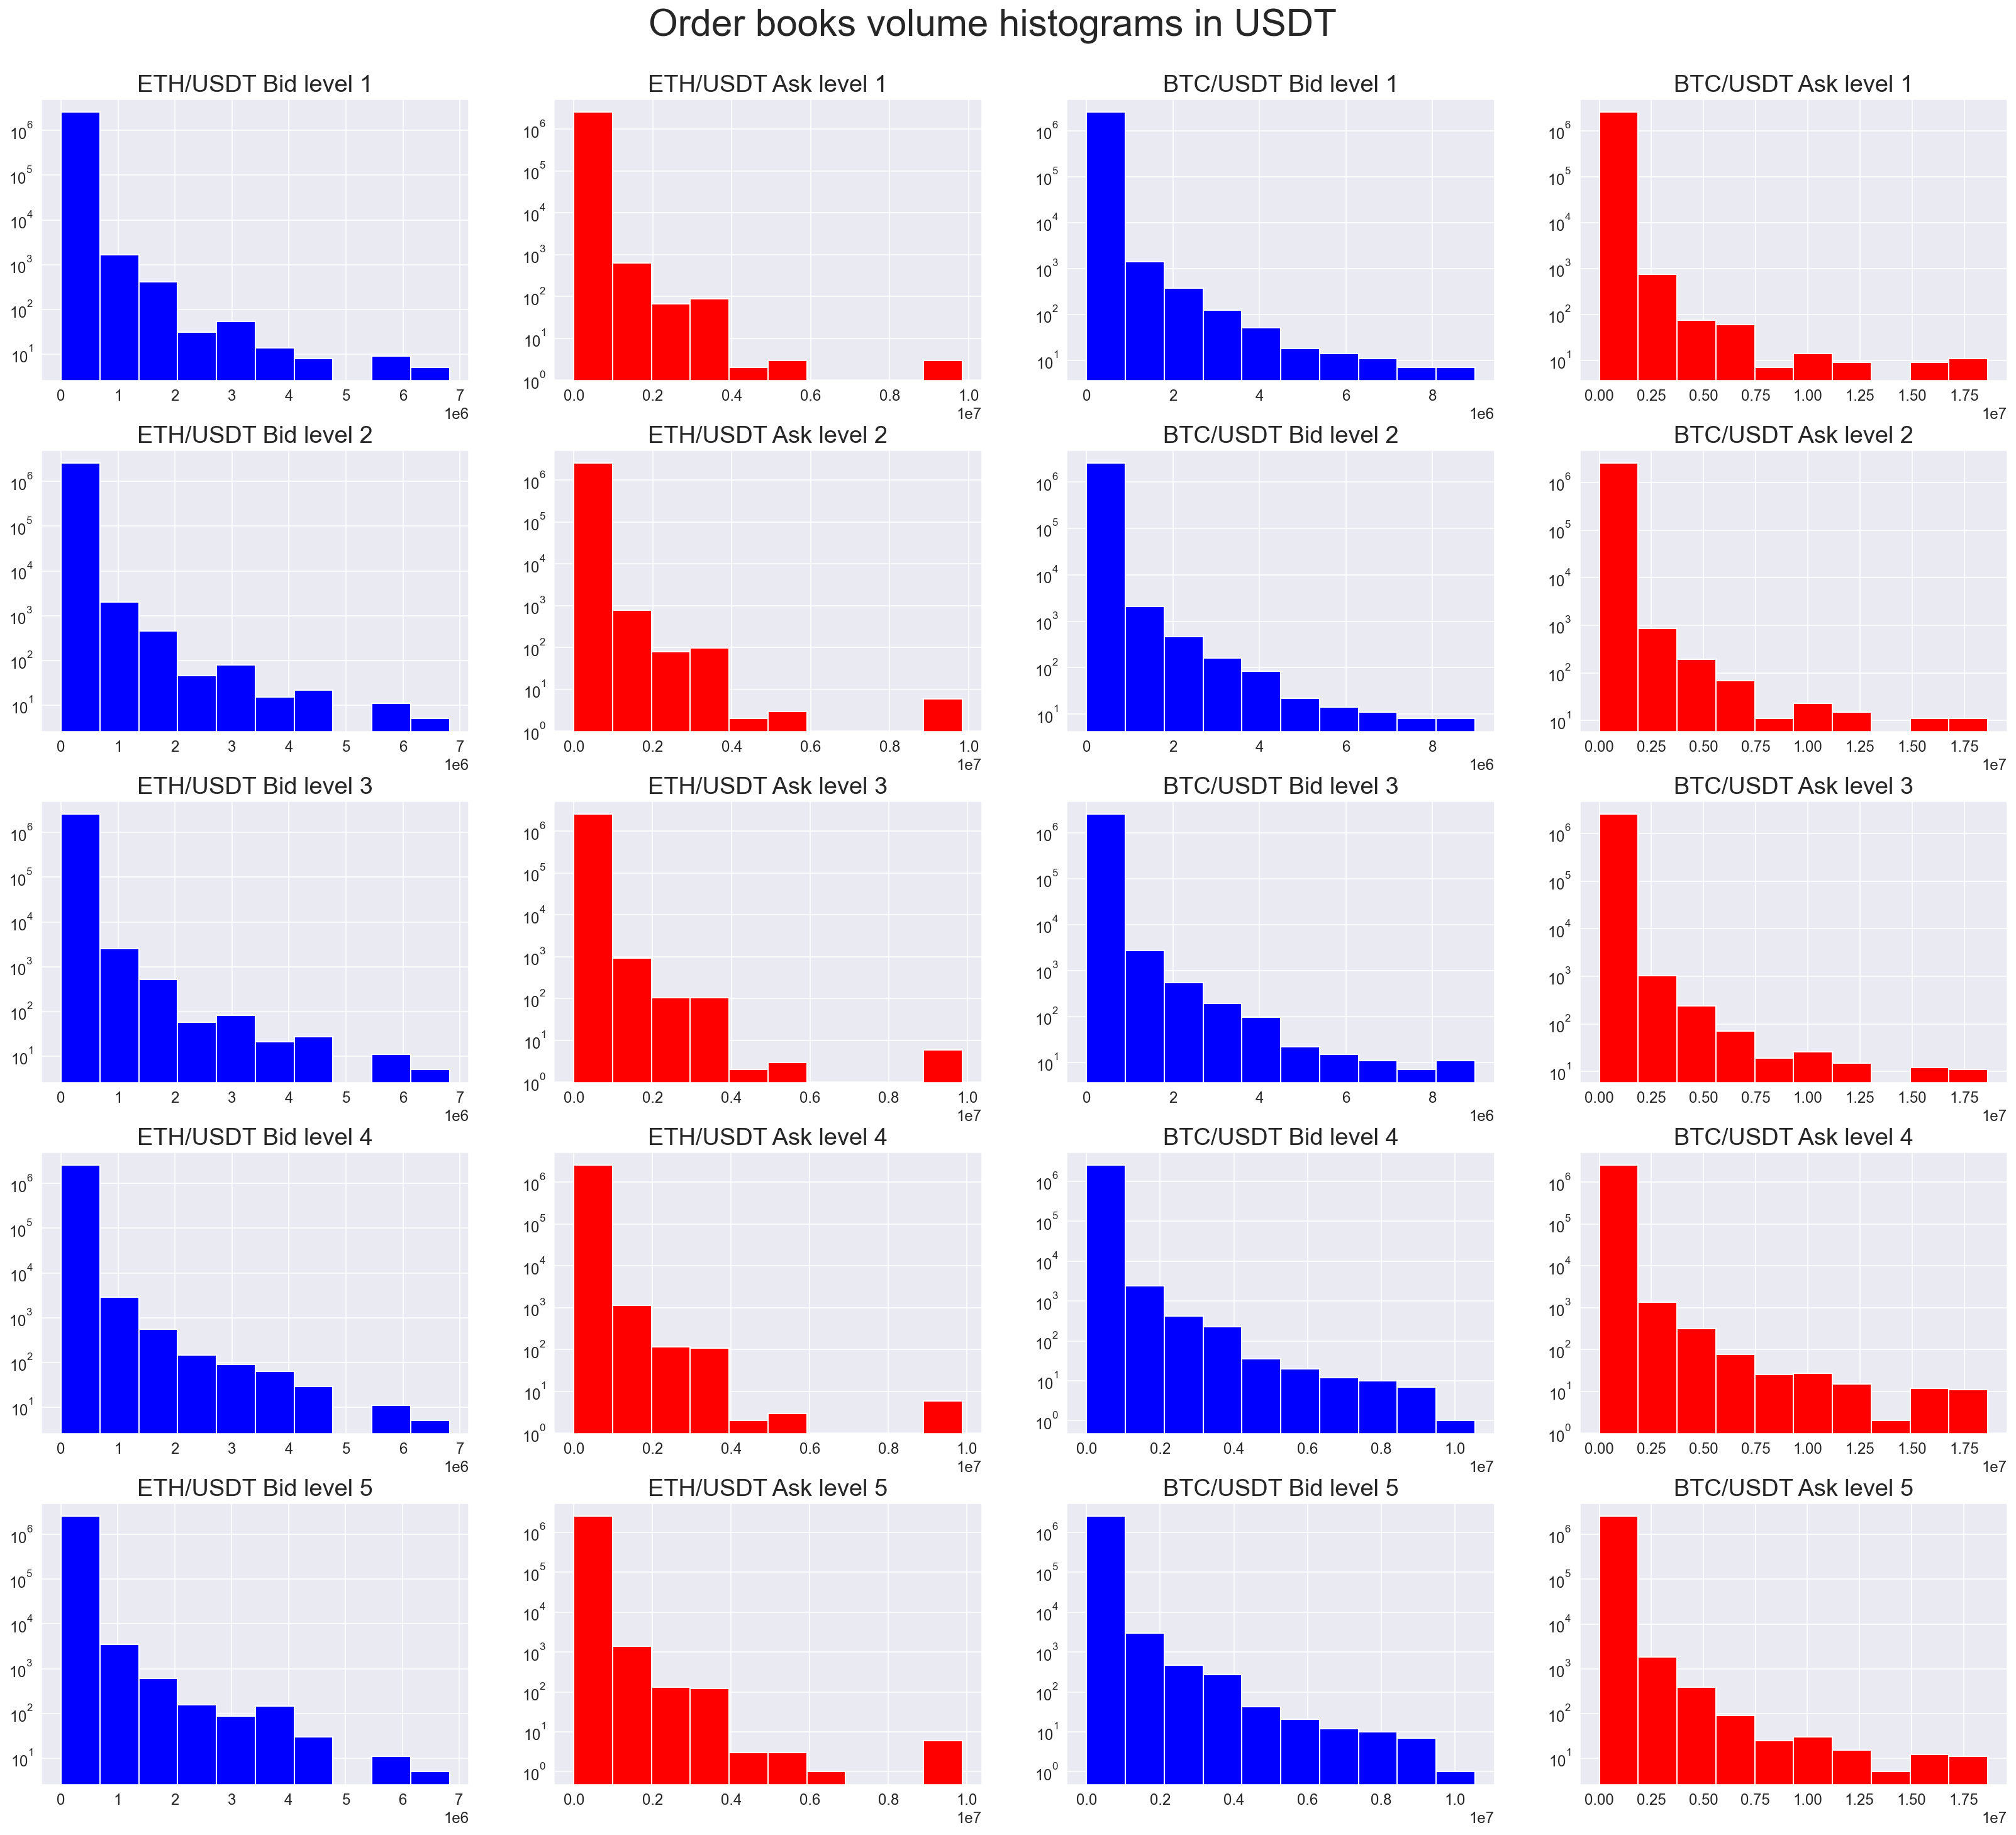

In [18]:
fig, ax = plt.subplots(5,4, figsize=(28,20))
currencies = ['ETH/USDT', 'BTC/USDT']
bidask = ['Bid', 'Ask']
for level in range(5):
    for currency_ind in range(2):
        for bidask_ind in range(2):
            ax[level][bidask_ind + 2*currency_ind].hist(arr[currency_ind][bidask_ind][:, level] , log=True,
                                                        color="r"*bidask_ind + "b"*(1-bidask_ind))
            ax[level][bidask_ind + 2*currency_ind].set_title(
                currencies[currency_ind] + ' ' + bidask[bidask_ind] + ' level ' + str(level + 1), fontsize=19
            )
fig.suptitle('Order books volume histograms in USDT', fontsize=30)
fig.subplots_adjust(top=0.93, bottom=0,hspace=0.25)
plt.show()

# 4 задание


In [103]:
eth_lobs = eth_lobs.rename(columns={' exchange_ts':'exchange_ts'})
btc_lobs = btc_lobs.rename(columns={' exchange_ts':'exchange_ts'})

In [25]:
# from tqdm import tqdm
# eth_trades['last_lobs_ind'] = np.nan
# for ind, row in tqdm(eth_trades[(eth_trades.aggro_side == side) & (eth_trades[used_time] >= cur_book_time)].iterrows()):
#     cur_time = row[used_time]
#     next_book_time = eth_lobs.loc[cur_book_time_ind + 1, used_time]
#     if cur_time < next_book_time: # dont change
#         eth_trades.loc[ind, 'last_lobs_ind'] = cur_book_time
#     else:
#         cur_book_time_ind += 1
#         cur_book_time = eth_lobs.loc[cur_book_time_ind, used_time]
#         eth_trades.loc[ind, 'last_lobs_ind'] = cur_book_time

In [96]:
merged = eth_trades[eth_trades.aggro_side == 'ASK'].merge(eth_lobs, on='exchange_ts')
merged = merged.loc[merged['size'] >= merged['ethusdt:Binance:LinearPerpetual_ask_vol_0']]
cols = merged.iloc[:, 8:-1:4].columns.to_numpy()

In [97]:
merged

,receive_ts_x,exchange_ts,aggro_side,price,size,volume,receive_ts_y,ethusdt:Binance:LinearPerpetual_ask_price_0,ethusdt:Binance:LinearPerpetual_ask_vol_0,ethusdt:Binance:LinearPerpetual_bid_price_0,...,ethusdt:Binance:LinearPerpetual_ask_price_8,ethusdt:Binance:LinearPerpetual_ask_vol_8,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9,best_ask,best_bid
1,1655942409209586514,1655942409207000000,ASK,1049.44,2.500,2623.60000,1655942409208486387,1049.46,1.165,1049.44,...,1049.54,32.410,1049.30,1.452,1049.55,2.348,1049.29,2.387,1049.46,1049.29
2,1655942409209710741,1655942409207000000,ASK,1049.44,4.277,4488.45488,1655942409208486387,1049.46,1.165,1049.44,...,1049.54,32.410,1049.30,1.452,1049.55,2.348,1049.29,2.387,1049.46,1049.29
3,1655942409434304725,1655942409432000000,ASK,1049.44,4.710,4942.86240,1655942409433158372,1049.48,2.165,1049.44,...,1049.56,5.103,1048.83,4.455,1049.57,2.229,1048.82,8.404,1049.48,1048.82
5,1655942409434754799,1655942409432000000,ASK,1049.20,4.053,4252.40760,1655942409433158372,1049.48,2.165,1049.44,...,1049.56,5.103,1048.83,4.455,1049.57,2.229,1048.82,8.404,1049.48,1048.82
7,1655942409435280147,1655942409432000000,ASK,1049.15,4.053,4252.20495,1655942409433158372,1049.48,2.165,1049.44,...,1049.56,5.103,1048.83,4.455,1049.57,2.229,1048.82,8.404,1049.48,1048.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67942,1656028623409004076,1656028623406000000,ASK,1143.51,3.708,4240.13508,1656028623411246767,1143.98,1.080,1143.97,...,1144.12,2.953,1143.53,5.297,1144.13,2.367,1143.52,0.511,1143.98,1143.52
67953,1656028640133146307,1656028640132000000,ASK,1143.81,2.400,2745.14400,1656028640133033043,1143.82,1.238,1143.81,...,1144.03,4.322,1143.63,0.013,1144.05,0.011,1143.61,0.800,1143.82,1143.61
67954,1656028640133213912,1656028640132000000,ASK,1143.81,2.094,2395.13814,1656028640133033043,1143.82,1.238,1143.81,...,1144.03,4.322,1143.63,0.013,1144.05,0.011,1143.61,0.800,1143.82,1143.61
67973,1656028686600233802,1656028686599000000,ASK,1144.44,32.304,36969.98976,1656028686599757051,1144.45,30.551,1144.44,...,1144.58,28.101,1144.28,1.185,1144.60,2.653,1144.26,0.718,1144.45,1144.26


In [98]:
for col in cols:
    merged.loc[:, col] = merged[col] < merged['size']
merged

,receive_ts_x,exchange_ts,aggro_side,price,size,volume,receive_ts_y,ethusdt:Binance:LinearPerpetual_ask_price_0,ethusdt:Binance:LinearPerpetual_ask_vol_0,ethusdt:Binance:LinearPerpetual_bid_price_0,...,ethusdt:Binance:LinearPerpetual_ask_price_8,ethusdt:Binance:LinearPerpetual_ask_vol_8,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9,best_ask,best_bid
1,1655942409209586514,1655942409207000000,ASK,1049.44,2.500,2623.60000,1655942409208486387,1049.46,True,1049.44,...,1049.54,False,1049.30,1.452,1049.55,True,1049.29,2.387,1049.46,1049.29
2,1655942409209710741,1655942409207000000,ASK,1049.44,4.277,4488.45488,1655942409208486387,1049.46,True,1049.44,...,1049.54,False,1049.30,1.452,1049.55,True,1049.29,2.387,1049.46,1049.29
3,1655942409434304725,1655942409432000000,ASK,1049.44,4.710,4942.86240,1655942409433158372,1049.48,True,1049.44,...,1049.56,False,1048.83,4.455,1049.57,True,1048.82,8.404,1049.48,1048.82
5,1655942409434754799,1655942409432000000,ASK,1049.20,4.053,4252.40760,1655942409433158372,1049.48,True,1049.44,...,1049.56,False,1048.83,4.455,1049.57,True,1048.82,8.404,1049.48,1048.82
7,1655942409435280147,1655942409432000000,ASK,1049.15,4.053,4252.20495,1655942409433158372,1049.48,True,1049.44,...,1049.56,False,1048.83,4.455,1049.57,True,1048.82,8.404,1049.48,1048.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67942,1656028623409004076,1656028623406000000,ASK,1143.51,3.708,4240.13508,1656028623411246767,1143.98,True,1143.97,...,1144.12,True,1143.53,5.297,1144.13,True,1143.52,0.511,1143.98,1143.52
67953,1656028640133146307,1656028640132000000,ASK,1143.81,2.400,2745.14400,1656028640133033043,1143.82,True,1143.81,...,1144.03,False,1143.63,0.013,1144.05,True,1143.61,0.800,1143.82,1143.61
67954,1656028640133213912,1656028640132000000,ASK,1143.81,2.094,2395.13814,1656028640133033043,1143.82,True,1143.81,...,1144.03,False,1143.63,0.013,1144.05,True,1143.61,0.800,1143.82,1143.61
67973,1656028686600233802,1656028686599000000,ASK,1144.44,32.304,36969.98976,1656028686599757051,1144.45,True,1144.44,...,1144.58,True,1144.28,1.185,1144.60,True,1144.26,0.718,1144.45,1144.26


In [99]:
merged['broken'] = merged[cols].sum(axis=1)

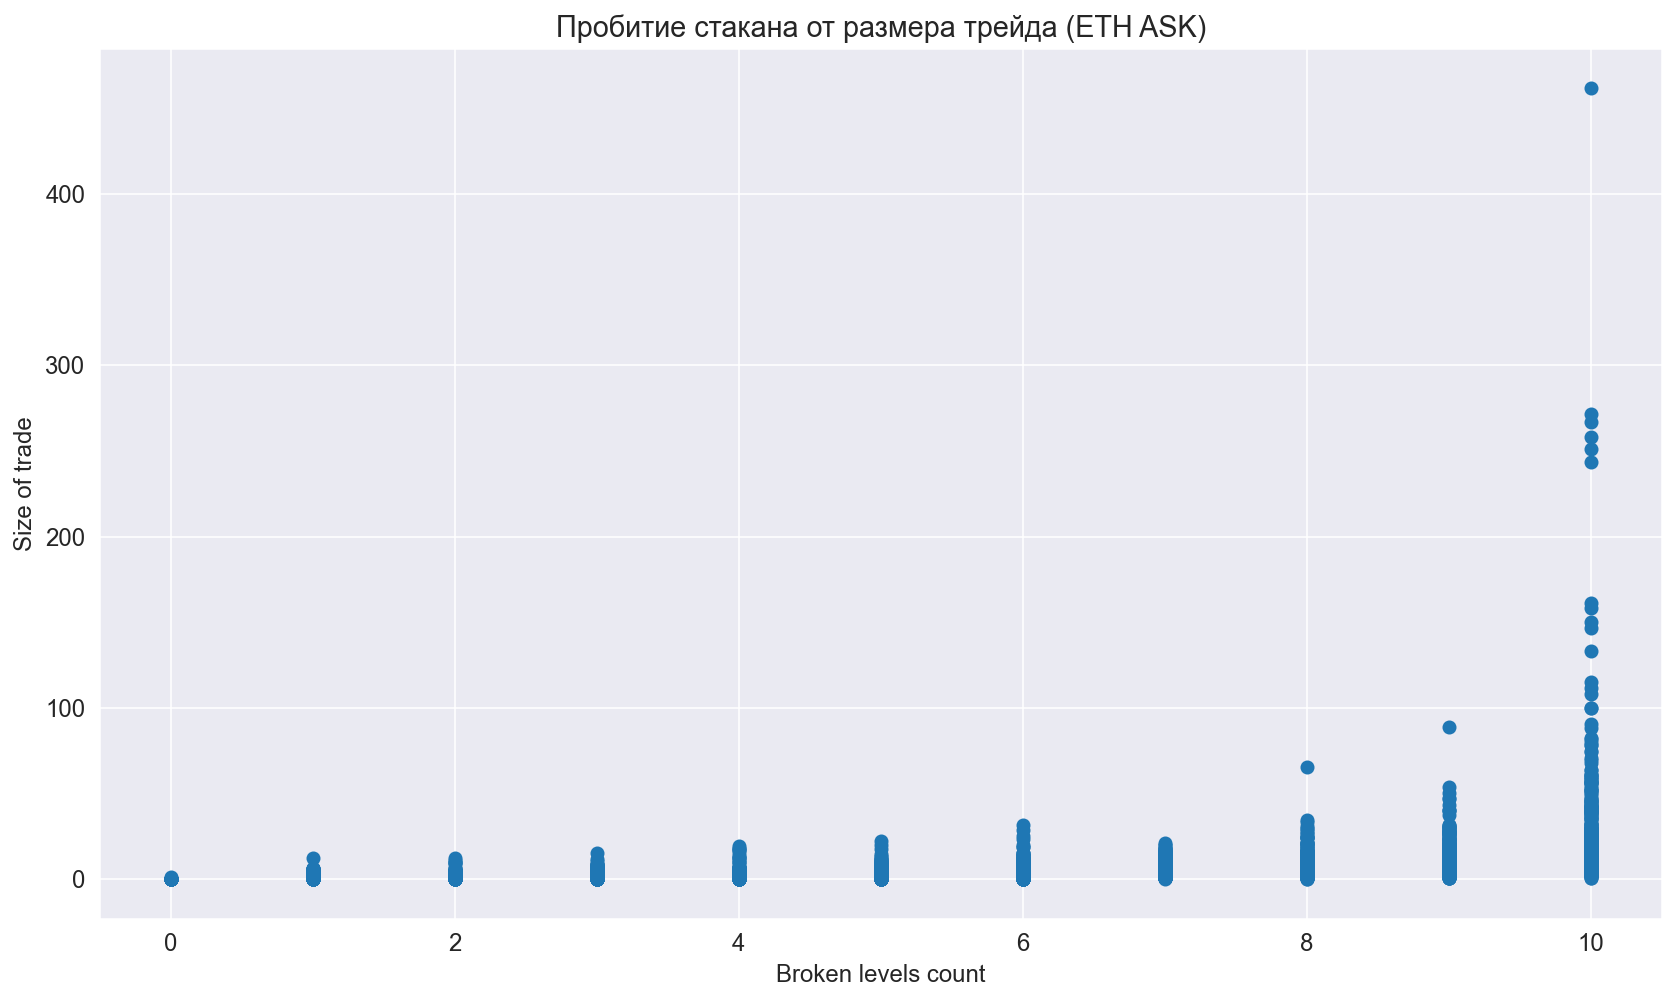

In [100]:
plt.scatter(merged['broken'], merged['size'])
plt.xlabel('Broken levels count')
plt.ylabel('Size of trade')
plt.title('Пробитие стакана от размера трейда (ETH ASK)')
None

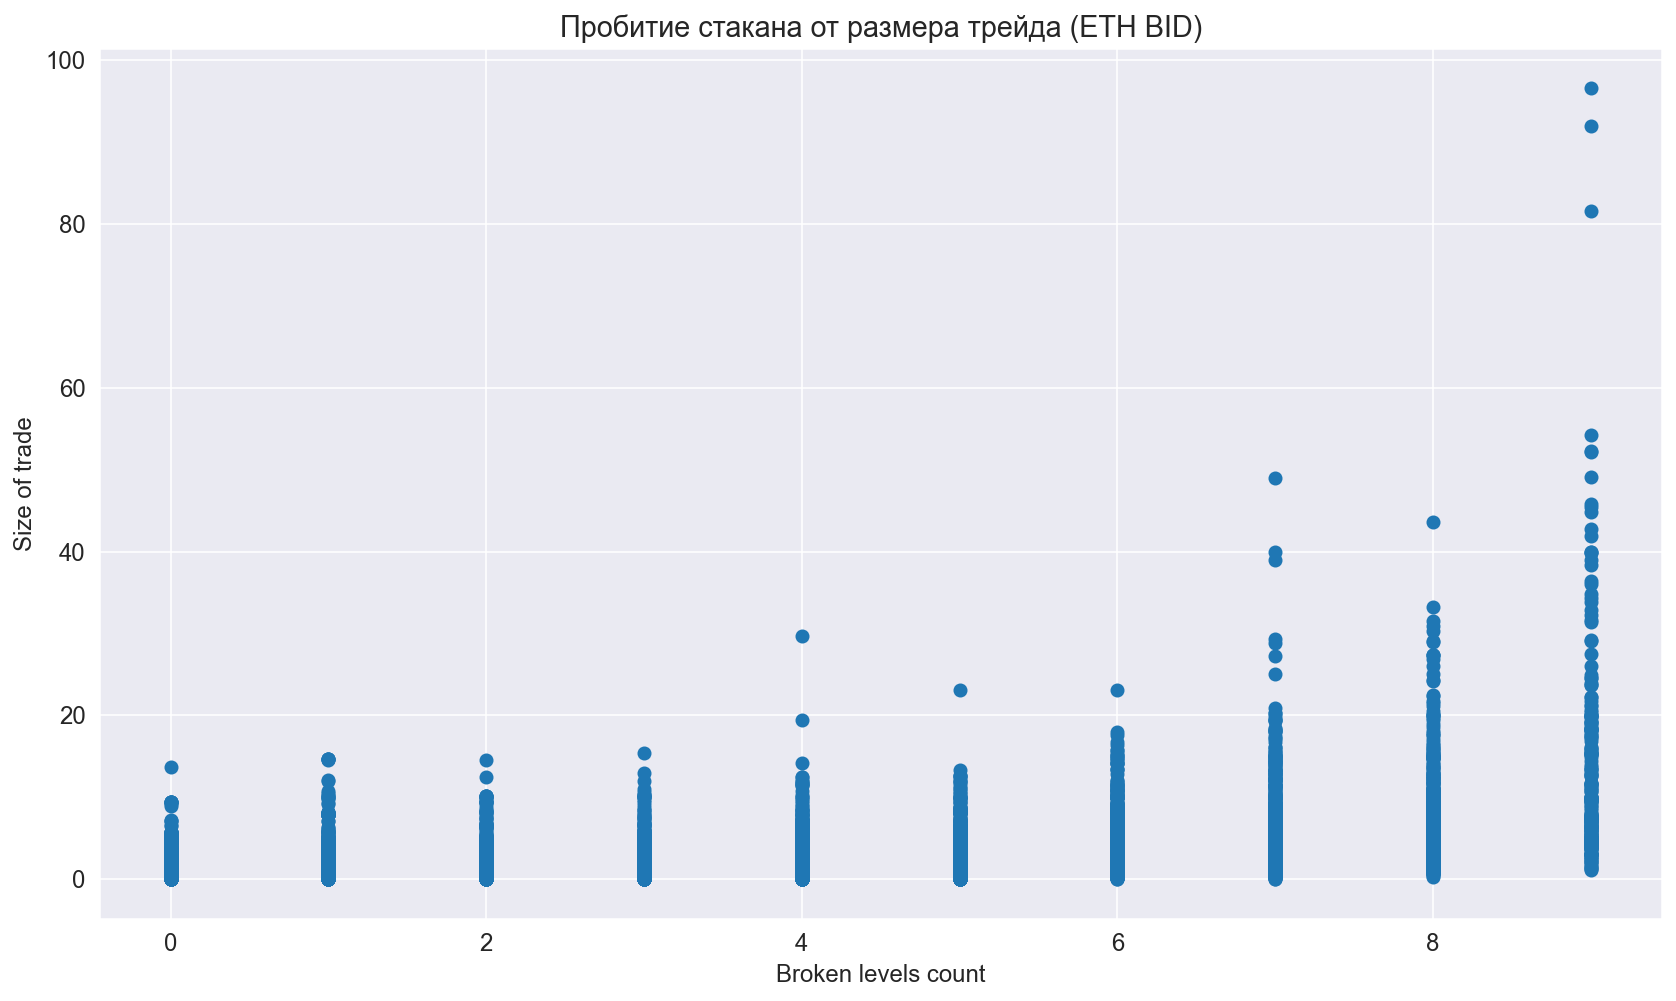

In [101]:
merged = eth_trades[eth_trades.aggro_side == 'BID'].merge(eth_lobs, on='exchange_ts')
merged = merged.loc[merged['size'] <= merged['ethusdt:Binance:LinearPerpetual_bid_vol_0']]
cols = merged.iloc[:, 10:-1:4].columns.to_numpy()
for col in cols:
    merged.loc[:, col] = merged[col] < merged['size']
merged['broken'] = merged[cols].sum(axis=1)

plt.scatter(merged['broken'], merged['size'])
plt.xlabel('Broken levels count')
plt.ylabel('Size of trade')
plt.title('Пробитие стакана от размера трейда (ETH BID)')
None

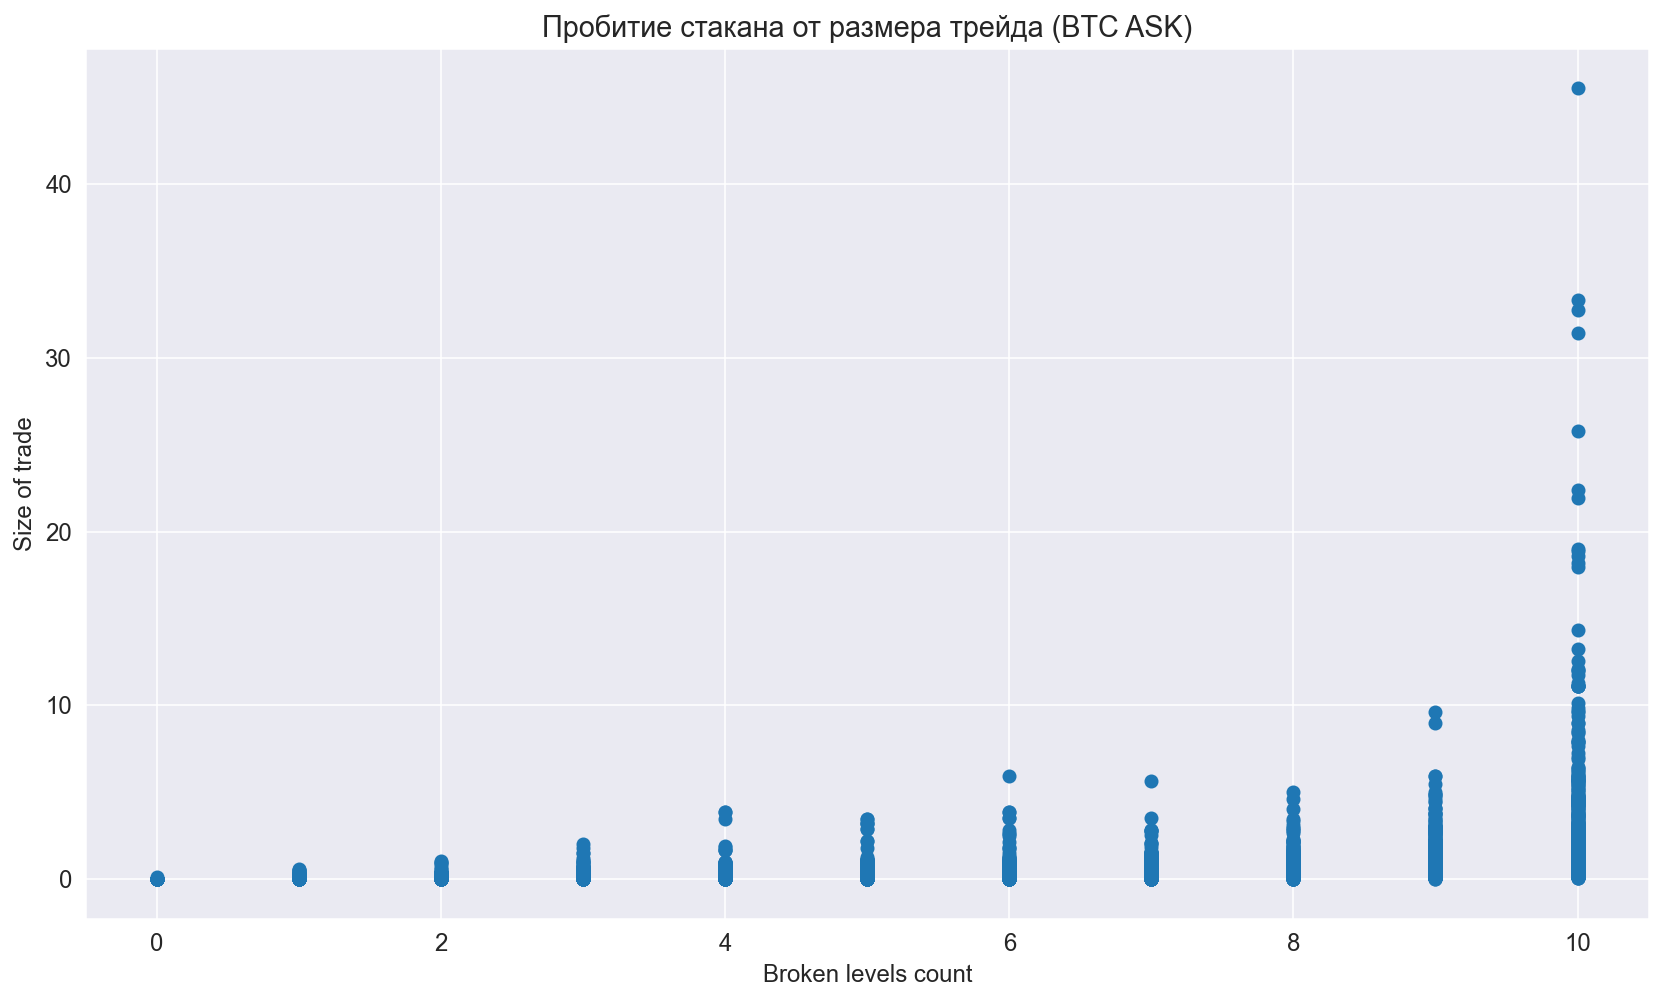

In [106]:
merged = btc_trades[btc_trades.aggro_side == 'ASK'].merge(btc_lobs, on='exchange_ts')
merged = merged.loc[merged['size'] >= merged['btcusdt:Binance:LinearPerpetual_ask_vol_0']]
cols = merged.iloc[:, 8:-1:4].columns.to_numpy()
for col in cols:
    merged.loc[:, col] = merged[col] < merged['size']
merged['broken'] = merged[cols].sum(axis=1)
plt.scatter(merged['broken'], merged['size'])
plt.xlabel('Broken levels count')
plt.ylabel('Size of trade')
plt.title('Пробитие стакана от размера трейда (BTC ASK)')
None

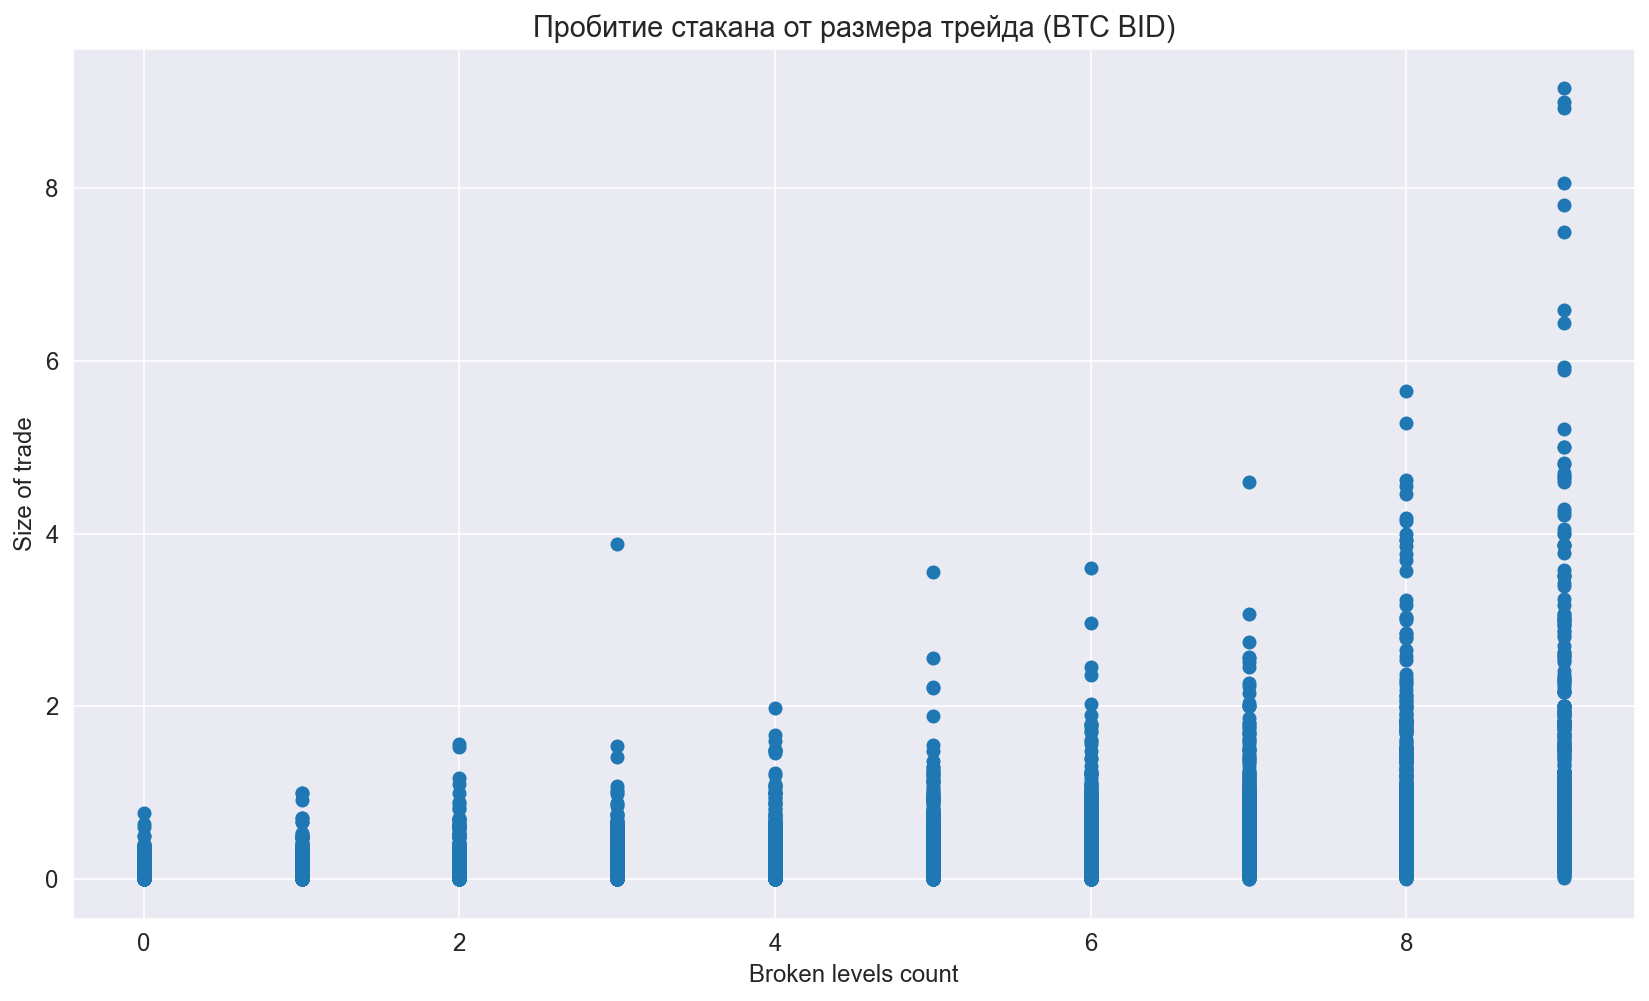

In [108]:
merged = btc_trades[btc_trades.aggro_side == 'BID'].merge(btc_lobs, on='exchange_ts')
merged = merged.loc[merged['size'] <= merged['btcusdt:Binance:LinearPerpetual_bid_vol_0']]
cols = merged.iloc[:, 10:-1:4].columns.to_numpy()
for col in cols:
    merged.loc[:, col] = merged[col] < merged['size']
merged['broken'] = merged[cols].sum(axis=1)
plt.scatter(merged['broken'], merged['size'])
plt.xlabel('Broken levels count')
plt.ylabel('Size of trade')
plt.title('Пробитие стакана от размера трейда (BTC BID)')
None

# 5 задание

In [128]:
btc_lobs['mid_btc'] = (btc_lobs['btcusdt:Binance:LinearPerpetual_ask_price_0'] + btc_lobs['btcusdt:Binance:LinearPerpetual_bid_price_0'])/2
eth_lobs['mid_eth'] = (eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0'] + eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0'])/2

In [129]:
btc_lobs

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9,best_ask,best_bid,mid,mid_btc
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.6,1.529,19980.2,0.010,19975.4,1.641,19977.5,19975.4,0.05,19977.45
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.8,0.686,19980.2,0.010,19975.7,4.455,19977.5,19975.7,0.05,19977.45
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.8,0.686,19980.2,0.010,19975.7,4.455,19977.5,19975.7,0.05,19977.45
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.8,0.686,19980.2,0.010,19975.7,4.455,19977.5,19975.7,0.05,19977.45
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.8,0.686,19980.2,0.010,19975.7,4.455,19977.5,19975.7,0.05,19977.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541351,1656028781390653694,1656028781390000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.1,0.232,21092.6,0.001,21087.0,2.484,21089.1,21087.0,0.05,21089.05
2541352,1656028781423672729,1656028781423000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.1,0.232,21092.5,0.550,21087.0,2.484,21089.1,21087.0,0.05,21089.05
2541353,1656028781457683317,1656028781457000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.1,0.232,21092.5,0.550,21087.0,2.484,21089.1,21087.0,0.05,21089.05
2541354,1656028781492806433,1656028781492000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.1,0.232,21092.5,0.550,21087.0,2.484,21089.1,21087.0,0.05,21089.05


In [130]:
merged = btc_lobs.merge(right=eth_lobs, on='exchange_ts')
merged

,receive_ts_x,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9,best_ask_y,best_bid_y,mid_y,mid_eth
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,1049.30,1.452,1049.54,27.741,1049.29,2.387,1049.45,1049.29,0.005,1049.445
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,1049.30,1.452,1049.54,27.741,1049.29,2.387,1049.45,1049.29,0.005,1049.445
2,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,1049.30,1.452,1049.54,27.741,1049.29,2.387,1049.45,1049.29,0.005,1049.445
3,1655942404488775046,1655942404488000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,1049.30,1.452,1049.54,27.741,1049.29,2.387,1049.45,1049.29,0.005,1049.445
4,1655942405044733617,1655942405044000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,1049.30,1.452,1049.54,27.741,1049.29,2.387,1049.45,1049.29,0.005,1049.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361491,1656028780561791399,1656028780561000000,21089.0,0.099,21088.9,8.262,21089.1,4.635,21088.8,1.990,...,1143.38,12.797,1143.79,11.740,1143.37,11.667,1143.54,1143.37,0.005,1143.535
361492,1656028780593854924,1656028780593000000,21089.0,0.099,21088.9,7.946,21089.1,4.635,21088.8,1.990,...,1143.38,12.797,1143.79,11.740,1143.37,11.667,1143.54,1143.37,0.005,1143.535
361493,1656028780627172712,1656028780626000000,21089.0,0.099,21088.9,8.452,21089.1,4.635,21088.8,1.800,...,1143.38,12.797,1143.80,3.498,1143.37,11.667,1143.54,1143.37,0.005,1143.535
361494,1656028780694971148,1656028780694000000,21089.0,2.049,21088.9,7.400,21089.1,4.635,21088.8,1.800,...,1143.41,9.637,1143.82,1.823,1143.39,4.111,1143.63,1143.39,0.020,1143.610


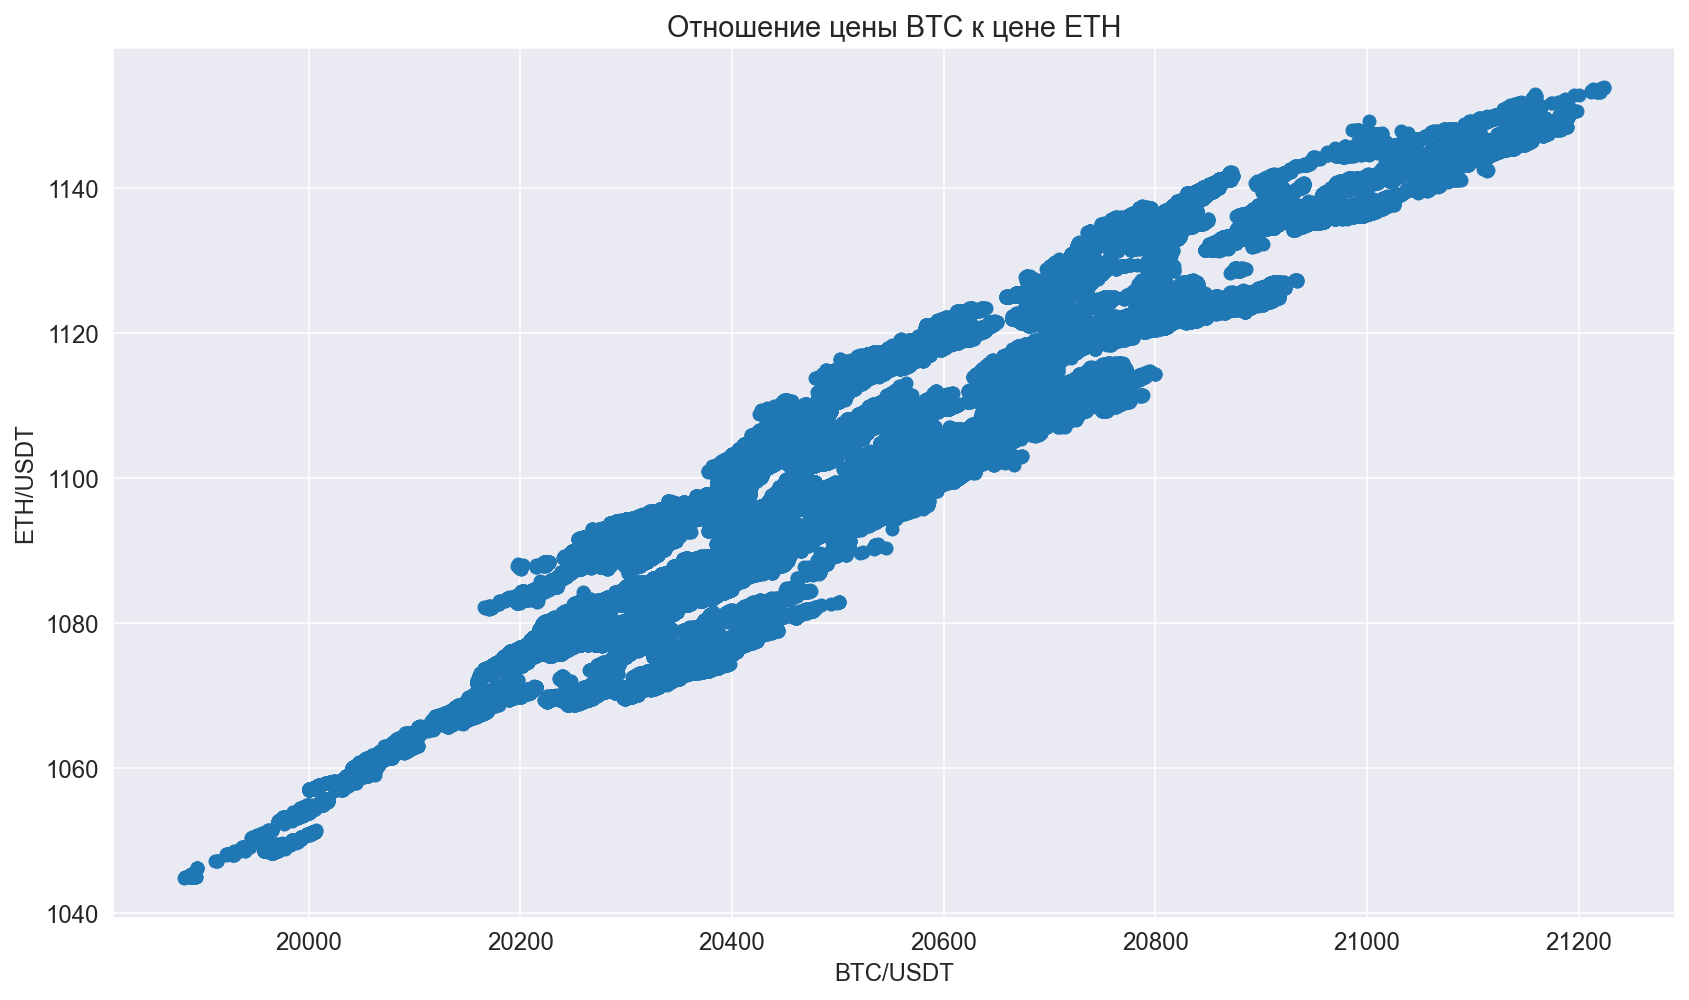

In [132]:
plt.scatter(merged['mid_btc'], merged['mid_eth'])
plt.xlabel('BTC/USDT')
plt.ylabel('ETH/USDT')
plt.title('Отношение цены BTC к цене ETH')
None

In [134]:
merged['mid_btc'].to_numpy()

array([19977.45, 19977.45, 19977.45, ..., 21088.95, 21088.95, 21088.95])

In [137]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(merged['mid_btc'].to_numpy().reshape(-1,1), merged['mid_eth'].to_numpy())
reg.coef_, reg.intercept_

(array([0.07987734]), -537.0009908945558)

In [139]:
np.arange(15000,22000,100)

array([15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800,
       15900, 16000, 16100, 16200, 16300, 16400, 16500, 16600, 16700,
       16800, 16900, 17000, 17100, 17200, 17300, 17400, 17500, 17600,
       17700, 17800, 17900, 18000, 18100, 18200, 18300, 18400, 18500,
       18600, 18700, 18800, 18900, 19000, 19100, 19200, 19300, 19400,
       19500, 19600, 19700, 19800, 19900, 20000, 20100, 20200, 20300,
       20400, 20500, 20600, 20700, 20800, 20900, 21000, 21100, 21200,
       21300, 21400, 21500, 21600, 21700, 21800, 21900])

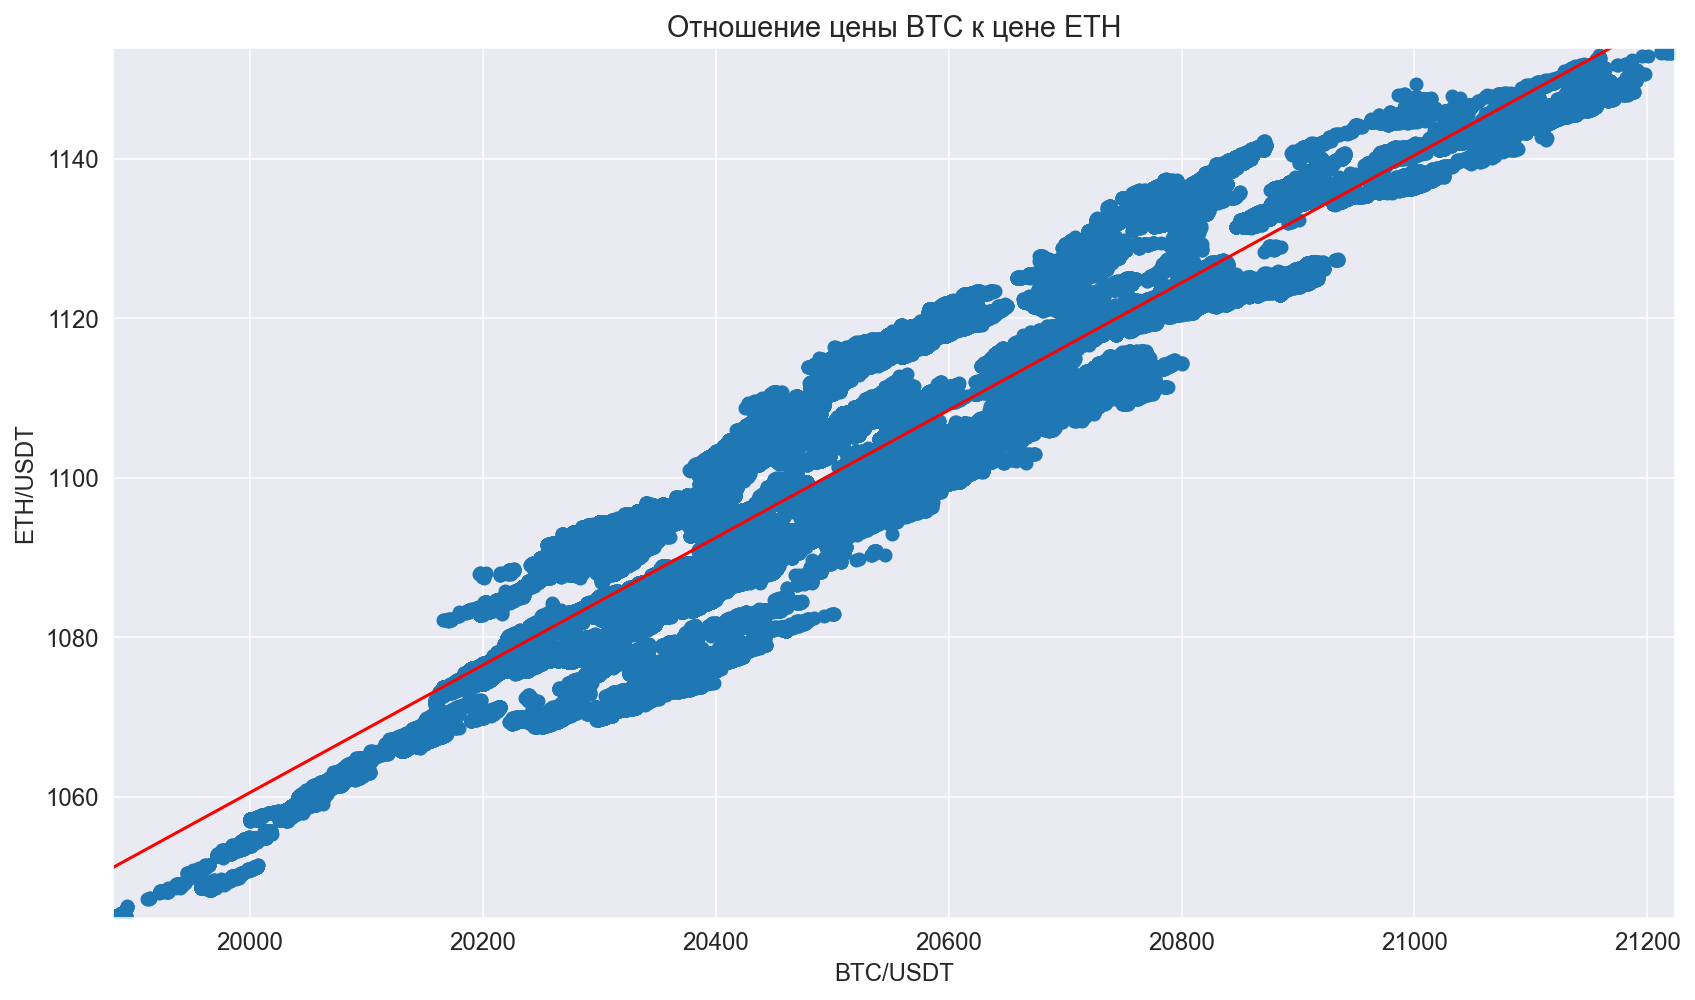

In [143]:
plt.scatter(merged['mid_btc'], merged['mid_eth'])
plt.xlabel('BTC/USDT')
plt.ylabel('ETH/USDT')
plt.title('Отношение цены BTC к цене ETH')
plt.plot(np.arange(15000,22000,100), np.arange(15000,22000,100) * reg.coef_ + reg.intercept_, color='red')

plt.ylim(merged['mid_eth'].min(),merged['mid_eth'].max())
plt.xlim(merged['mid_btc'].min(), merged['mid_btc'].max())
None